In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option=("display.max_columns",24)

In [3]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [4]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [6]:
dataset.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [7]:
dataset["Order Year"]=dataset['Order Date'].dt.year

In [8]:
dataset.shape

(9426, 25)

In [9]:
#dataset.isnull().sum()

In [10]:
dataset['Product Base Margin'] = dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())

# State or Province

In [11]:
dataset["State or Province"].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Exploratory data analysis

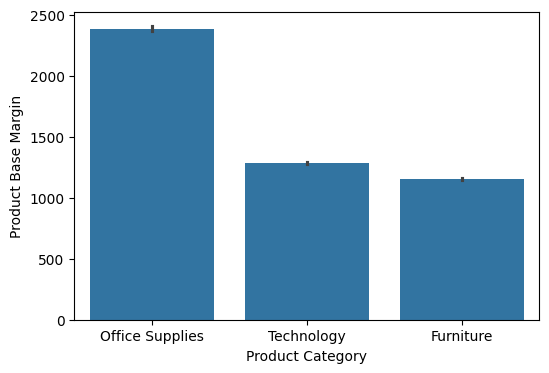

In [12]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data= dataset,estimator = 'sum')
plt.savefig("Product Base Margin.jpg")
plt.show()

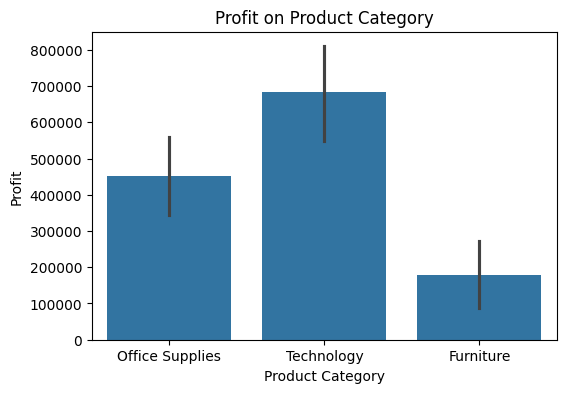

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Profit",data= dataset,estimator = 'sum')
plt.title("Profit on Product Category")
plt.savefig("Profit.jpg")
plt.show()

In [14]:
dataset["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

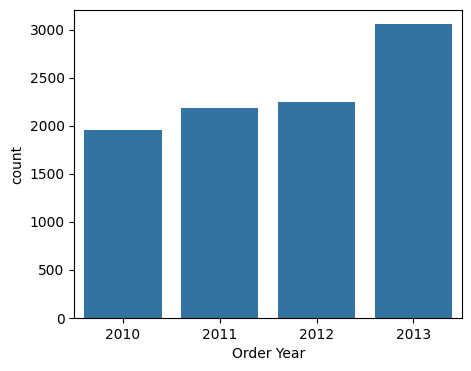

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year", data = dataset)
plt.savefig("Order Year.jpg")
plt.show()

# Product Category

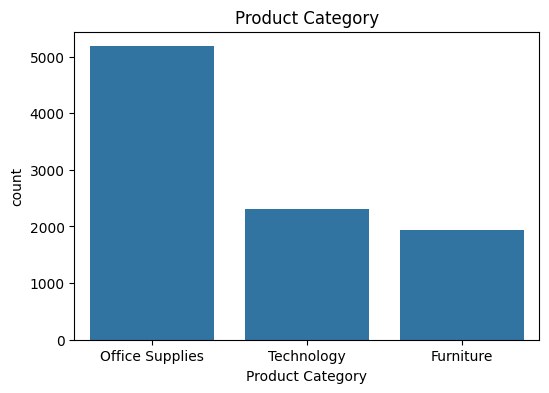

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category", data = dataset)
plt.title("Product Category")
plt.savefig("Product Category.jpg")
plt.show()

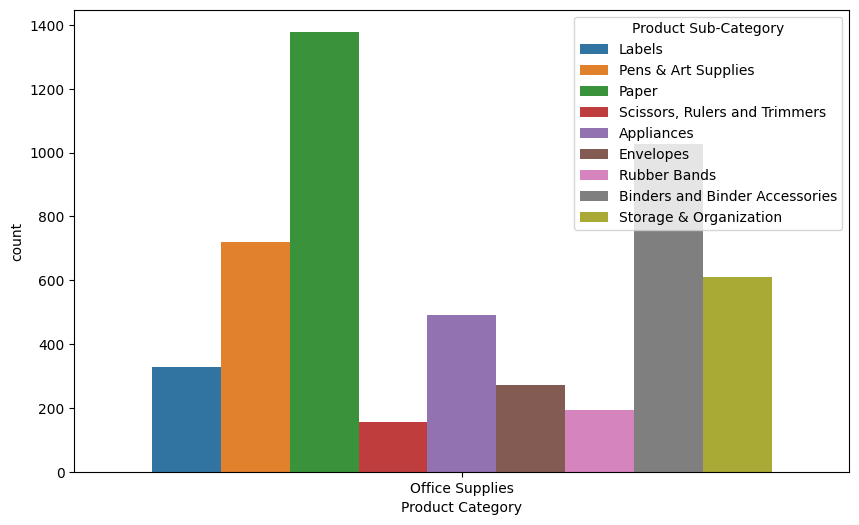

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = dataset[dataset["Product Category"]=="Office Supplies"], hue="Product Sub-Category")
plt.savefig("Product Category2.jpg")
plt.show()

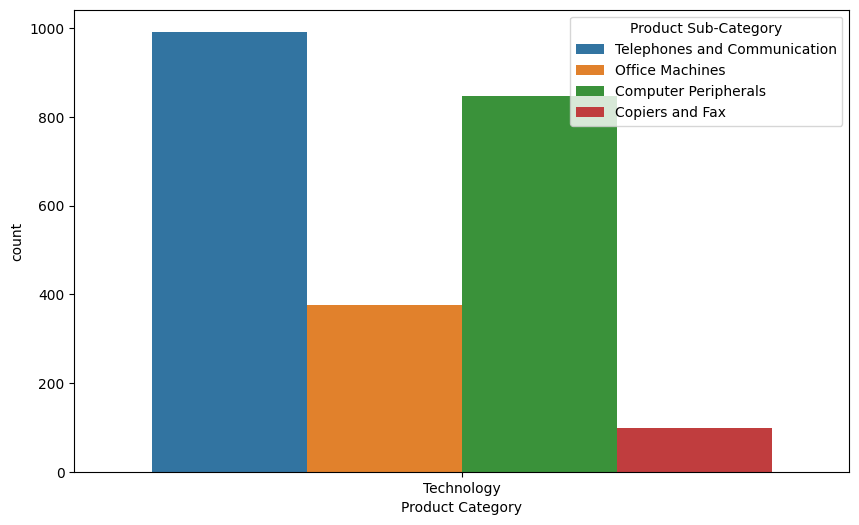

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = dataset[dataset["Product Category"]=="Technology"], hue="Product Sub-Category")
plt.savefig("Product Category3.jpg")
plt.show()

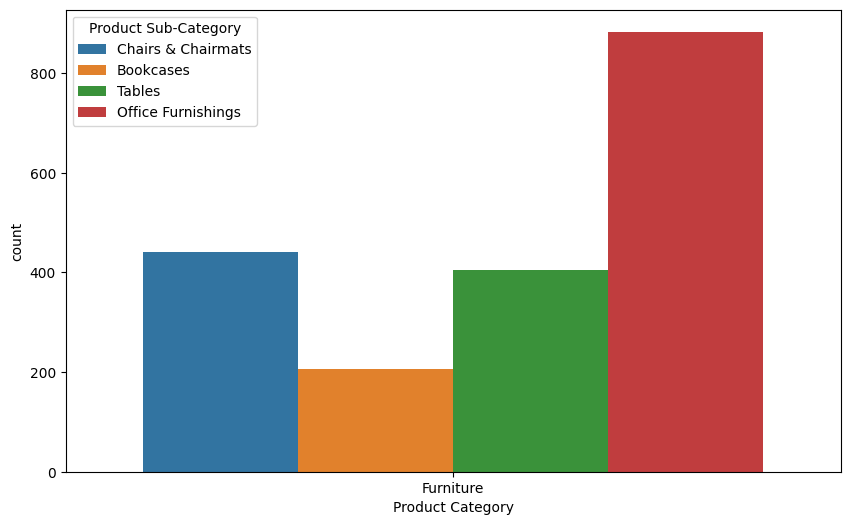

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category", data = dataset[dataset["Product Category"]=="Furniture"], hue="Product Sub-Category")
plt.savefig("Product Category4.jpg")
plt.show()

# Customer Segment

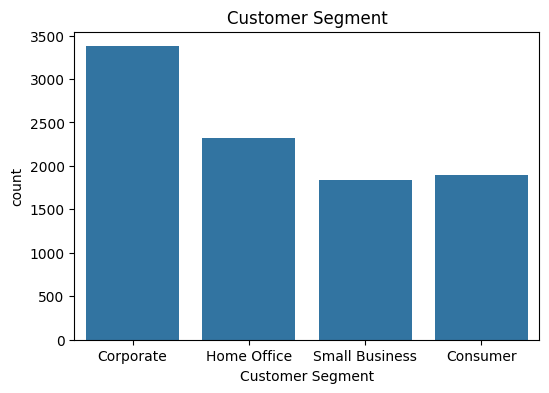

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment", data = dataset)
plt.title("Customer Segment")
plt.savefig("Customer Segment.jpg")
plt.show()

# Ship Mode

In [21]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [22]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

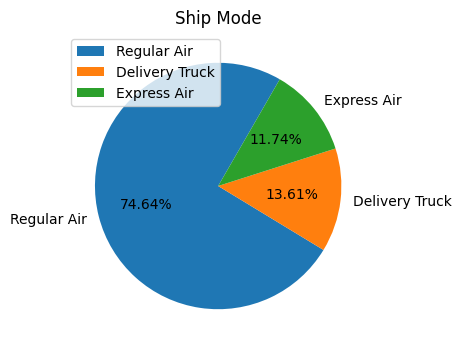

In [23]:
plt.figure(figsize=(5,4))
plt.pie(y, labels= x , startangle= 60, autopct="%0.2f%%")
plt.legend(loc = 2)
plt.title("Ship Mode")
plt.savefig("Ship Mode_pie.jpg")
plt.show()

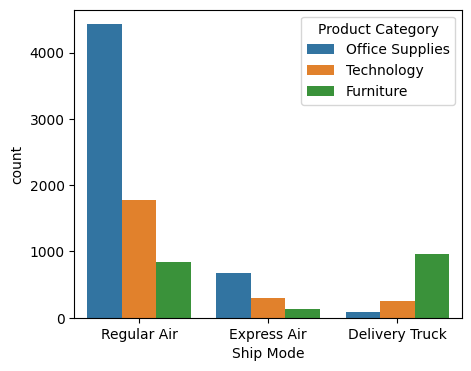

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Ship Mode", data = dataset, hue = "Product Category")
plt.savefig("Ship Mode_pie2.jpg")
plt.show()

# Order Priority

In [25]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

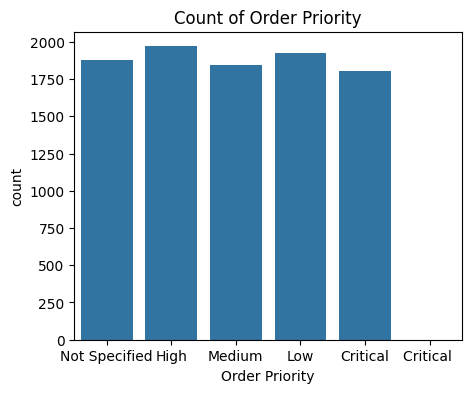

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(x = "Order Priority", data = dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

In [27]:
#dataset['Order Priority'].unique()

In [28]:
#dataset["Order Priority"] = dataset["Order Priority"].replace("Critical ","Critical")

# Linear Regression Modelling

In [29]:
# Select features and target variable (assuming numeric features only)
features = ["Discount", "Unit Price", "Shipping Cost", "Quantity ordered new"]
target = "Sales"  # Assuming you want to predict sales

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2)

In [35]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Make predictions on test data
predictions = model.predict(X_test)

In [41]:
# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4298914.622161652


In [38]:
# Select features and target variable (assuming numeric features only)
features = ["Discount", "Unit Price", "Shipping Cost", "Quantity ordered new"]
target = "Profit"  # Assuming you want to predict profit

In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2)

In [40]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on test data
predictions = model.predict(X_test)

In [42]:
# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4298914.622161652
